In [1]:
from utils import load_dataset, preprocess, extract_feature_target_columns
from models.lgb_model import LGBModel
from sklearn.model_selection import train_test_split

In [2]:
df = load_dataset("datasets/Bitfinex_BTCUSD_1h.csv")
df

,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC
0,1.658710e+12,25/07/2022 00:00,BTC/USD,22578.00000,22663.27986,22268.00000,22294.00000,2.668725e+06,119.705976
1,1.658700e+12,24/07/2022 23:00,BTC/USD,22655.00000,22751.00000,22518.00000,22580.43245,1.499313e+06,66.398751
2,1.658700e+12,24/07/2022 22:00,BTC/USD,22814.00000,23006.00000,22552.31166,22655.00000,4.757591e+06,210.001830
3,1.658700e+12,24/07/2022 21:00,BTC/USD,22720.66998,22827.00000,22677.54867,22813.00000,1.378049e+06,60.406305
4,1.658690e+12,24/07/2022 20:00,BTC/USD,22714.01790,22799.00000,22677.00000,22722.00000,1.079021e+06,47.487931
...,...,...,...,...,...,...,...,...,...
35774,1.526378e+09,15/05/2018 10:00,BTC/USD,8708.10000,8855.70000,8695.80000,8784.40000,1.730972e+07,1969.080000
35775,1.526375e+09,15/05/2018 09:00,BTC/USD,8723.70000,8737.80000,8701.20000,8708.10000,2.054868e+06,235.550000
35776,1.526371e+09,15/05/2018 08:00,BTC/USD,8743.00000,8743.10000,8653.20000,8723.70000,8.891773e+06,1023.310000
35777,1.526368e+09,15/05/2018 07:00,BTC/USD,8739.00000,8754.80000,8719.30000,8743.00000,2.288904e+06,261.970000


In [3]:
df = preprocess(df)
X, y = extract_feature_target_columns(df)
X

100%|████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 787.59it/s]


,KMID,SMA_window_10
9,0.003667,0.008034
10,0.009959,0.002209
11,0.003403,-0.007751
12,-0.007576,-0.010450
13,0.006841,-0.001699
...,...,...
35769,0.001033,0.001870
35770,-0.027091,0.000159
35771,-0.002219,0.023384
35772,0.000776,0.022099


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8, random_state=0)
best_params = {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 500, 'num_leaves': 3}

model = LGBModel(best_params)
model.fit(X_train, y_train, X_test, y_test)

[1]	training's l2: 0.000320425	valid_1's l2: 0.000307573
[2]	training's l2: 0.000316701	valid_1's l2: 0.000304237
[3]	training's l2: 0.000313299	valid_1's l2: 0.000301124
[4]	training's l2: 0.000310203	valid_1's l2: 0.000298335
[5]	training's l2: 0.000307245	valid_1's l2: 0.00029564
[6]	training's l2: 0.000304616	valid_1's l2: 0.00029329
[7]	training's l2: 0.000302088	valid_1's l2: 0.000290993
[8]	training's l2: 0.000299826	valid_1's l2: 0.000289021
[9]	training's l2: 0.000297648	valid_1's l2: 0.000287041
[10]	training's l2: 0.000295728	valid_1's l2: 0.000285293
[11]	training's l2: 0.000293857	valid_1's l2: 0.000283521
[12]	training's l2: 0.000292012	valid_1's l2: 0.000281877
[13]	training's l2: 0.000290406	valid_1's l2: 0.000280506
[14]	training's l2: 0.000288796	valid_1's l2: 0.00027908
[15]	training's l2: 0.000287343	valid_1's l2: 0.000277696
[16]	training's l2: 0.000286002	valid_1's l2: 0.000276469
[17]	training's l2: 0.000284744	valid_1's l2: 0.000275345
[18]	training's l2: 0.0002

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

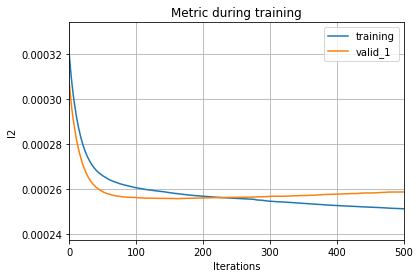

In [5]:
model.plot_metric()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

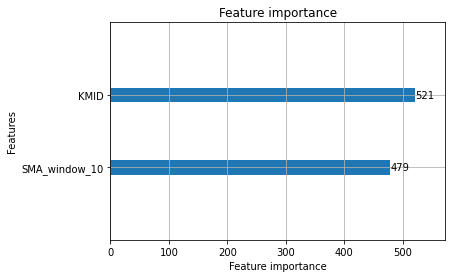

In [6]:
model.plot_importance()